# Zooms in on the extensile region of the system to see the effects of varying $k$

In [1]:
from os import listdir 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
root_dir = "data/k-scan-ext-zoom/"
# read all data filenames from the root_dir
k_scan_data = [name for name in listdir(root_dir) if not name=="README.txt"]
sample_data = np.loadtxt(root_dir+k_scan_data[0],delimiter=',',dtype=np.complex128)
# load them into np array of appropriate shapes
ng, nk = sample_data.shape
na = len(k_scan_data)
data = np.zeros((na, ng, nk), dtype=np.complex128)
for i in range(len(k_scan_data)):
    filename = k_scan_data[i]
    a_ind = int(filename.split("_")[1])
    data[a_ind] = np.loadtxt(root_dir + filename, delimiter=',', dtype=np.complex_)

Text(0.5, 1.0, 'Destablizing Effect of $k$')

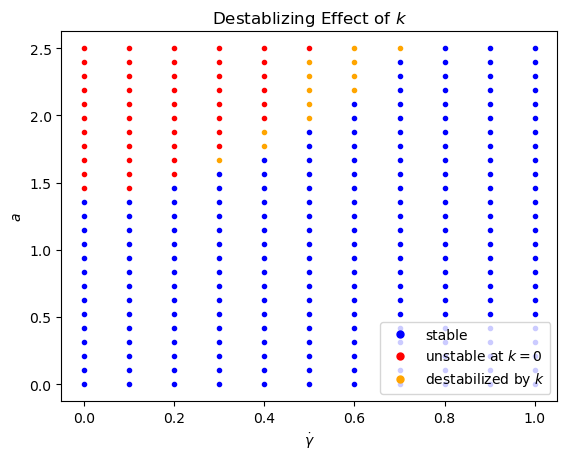

In [3]:
"""
==== THESE WERE THE NUMBERS USED TO GENERATE THIS DATA ====
gdl, gdr, gdn = 0,1,11
al, ar, an = 0,2.5,25
_gds = np.linspace(gdl,gdr,gdn)
_as = np.linspace(al,ar,an)
"""

gdl, gdr, gdn = 0,1,11
al, ar, an = 0,2.5,25
_gds = np.linspace(gdl,gdr,gdn)
_as = np.linspace(al,ar,an)

def max_re_mod(zs):
    if zs[0].real > 0:
        return zs[0], 0
    
    acc = -float('inf')
    index = -1
    for  i in range(len(zs)):
        z = zs[i]
        if z.real > acc.real:
            acc = z
            index = i
    return acc,index

for i in range(na):
    for j in range(ng):
        max_real_z, ind = max_re_mod(data[i][j])
        c = ("red" if ind==0 else "orange") if max_real_z.real > 0 else "blue"
        plt.plot(_gds[j],_as[i],".",color=c, picker=True, alpha=1)
blue_dot = mlines.Line2D([], [], color='blue', marker='.', linestyle='None',
                      markersize=10, label='stable')
red_dot = mlines.Line2D([], [], color='red', marker='.', linestyle='None',
                      markersize=10, label='unstable at $k=0$')
orange_dot = mlines.Line2D([], [], color='orange', marker='.', linestyle='None',
                      markersize=10, label='destabilized by $k$')
plt.legend(handles=[blue_dot, red_dot, orange_dot], loc="lower right")
plt.xlabel("$\dot\gamma$")
plt.ylabel("$a$")
plt.title("Destablizing Effect of $k$")